# Decision Tree vs Random Forest | Accuracy Gap Explained on Titanic
This is a followup of the last two YouTube videos:
* How a decision tree overfits the Titanic dataset: www.youtube.com/watch?v=offRb9fBOuw&t=29s
* Grid Search tuning random forest scores top 6%: www.youtube.com/watch?v=yVul279EMlA&t=45s

Every machine learning beginner runs into but rarely understands — the accuracy gap.
We train a model like a decision tree, and it scores 100% on the training data. Amazing, right?
But then... test accuracy drops. That’s overfitting. Today, I’ll compare a Decision Tree to a Random Forest using the Titanic dataset — and we’ll visually track how the accuracy gap reveals which model generalizes better.

# Train Data
Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and whether they survive or not. The shape of the train data is (891, 12). 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Preprocessing:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
passID=test_df['PassengerId']

# Fill missing Age and Fare values using the train set's median
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

test_df['Age'] = test_df['Age'].fillna(df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(df['Fare'].median())

# Now select features (after filling)
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
test_df = test_df[['Pclass', 'Sex', 'Age', 'Fare']]

# Split features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Step 2: Train models
overfit_tree = DecisionTreeClassifier(max_depth=None).fit(X_train, y_train)
forest = RandomForestClassifier(n_estimators=50, max_depth=5).fit(X_train, y_train)

In [3]:
from sklearn.metrics import accuracy_score

# Predict
y_pred_tree = overfit_tree.predict(X_test)
y_pred_forest = forest.predict(X_test)

# Accuracy
print("Decision Tree Train Accuracy:", round(overfit_tree.score(X_train, y_train), 3))
print("Decision Tree Test Accuracy:", round(accuracy_score(y_test, y_pred_tree), 3))

print("Random Forest Train Accuracy:", round(forest.score(X_train, y_train), 3))
print("Random Forest Test Accuracy:", round(accuracy_score(y_test, y_pred_forest), 3))


Decision Tree Train Accuracy: 0.979
Decision Tree Test Accuracy: 0.74
Random Forest Train Accuracy: 0.855
Random Forest Test Accuracy: 0.821


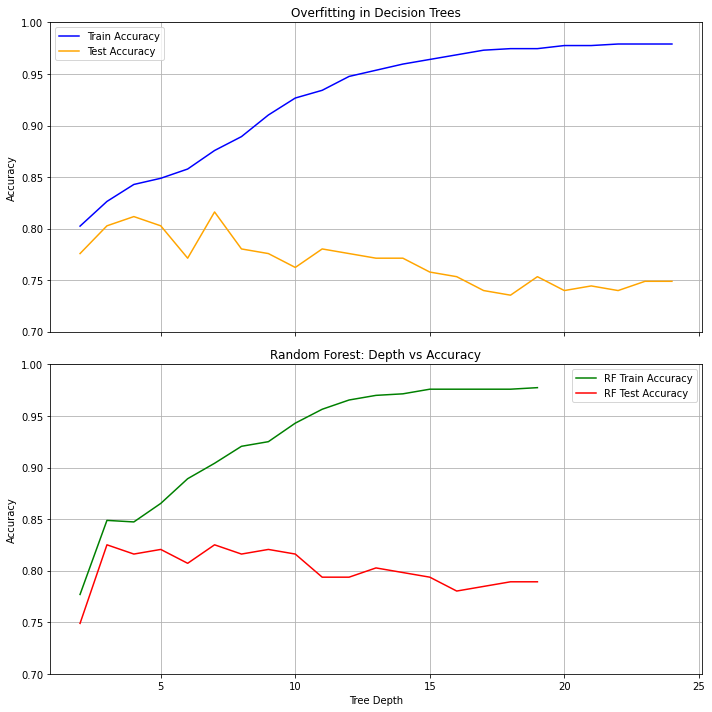

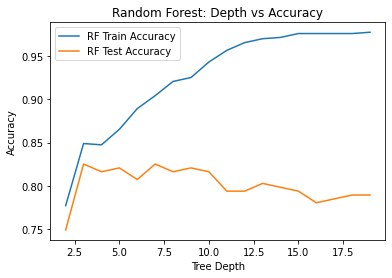

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Force both plots to use the same y-axis range
axes[0].set_ylim(0.7, 1.0)
axes[1].set_ylim(0.7, 1.0)

## --- DECISION TREE ---
depths_dt = range(2, 25)
train_acc_dt = []
test_acc_dt = []

for d in depths_dt:
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(X_train, y_train)
    train_acc_dt.append(model.score(X_train, y_train))
    test_acc_dt.append(model.score(X_test, y_test))

axes[0].plot(depths_dt, train_acc_dt, label='Train Accuracy', color='blue')
axes[0].plot(depths_dt, test_acc_dt, label='Test Accuracy', color='orange')
axes[0].set_title('Overfitting in Decision Trees')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

## --- RANDOM FOREST ---
depths_rf = range(2, 20)
rf_train_acc = []
rf_test_acc = []

for d in depths_rf:
    model = RandomForestClassifier(n_estimators=60, max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    rf_train_acc.append(model.score(X_train, y_train))
    rf_test_acc.append(model.score(X_test, y_test))

axes[1].plot(depths_rf, rf_train_acc, label='RF Train Accuracy', color='green')
axes[1].plot(depths_rf, rf_test_acc, label='RF Test Accuracy', color='red')
axes[1].set_title('Random Forest: Depth vs Accuracy')
axes[1].set_xlabel('Tree Depth')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()
plt.plot(depths_rf, rf_train_acc, label='RF Train Accuracy')
plt.plot(depths_rf, rf_test_acc, label='RF Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest: Depth vs Accuracy')
plt.legend()
plt.show()


### Graph Analysis
Train = 100%?! Test = 74%?! The decision tree is a great student — it memorizes everything perfectly... but flunks the test. That’s overfitting. The random forest, on the other hand, does a little worse on the training data — but performs more consistently on new data. That’s the power of ensemble learning

## Decision Boundary 

"On the left, this single decision tree is allowed to grow deep with no restriction, and you can see it memorizes the training data with tiny, sharp regions — that’s overfitting.
But on the right, the random forest averages 50 shallow trees, each trained on different subsets. It smooths those noisy patterns and creates a cleaner, more general boundary — that’s the power of ensembles."

In [5]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
Fare        float64
dtype: object

In [6]:
#Check Duplicates:
dupstr = df.duplicated()
print('Total no of duplicate values in Training Dataset = %d' % (dupstr.sum()))
df[dupstr].head(10)

Total no of duplicate values in Training Dataset = 128


,Survived,Pclass,Sex,Age,Fare
42,0,3,0,28.0,7.8958
47,1,3,1,28.0,7.7500
55,1,1,0,28.0,35.5000
76,0,3,0,28.0,7.8958
77,0,3,0,28.0,8.0500
87,0,3,0,28.0,8.0500
95,0,3,0,28.0,8.0500
101,0,3,0,28.0,7.8958
105,0,3,0,28.0,7.8958
120,0,2,0,21.0,73.5000


In [7]:
#search for columns with missing values:
def findNA():
    print("Missing data by column as a percent:")
    findNA=df.isnull().sum().sort_values(ascending=False)/len(df)
    print(findNA.head())
findNA() 

Missing data by column as a percent:
Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
Fare        0.0
dtype: float64


# Feature Engineer
We need to replace male and female into numbers. This is a very important part of the process because gender is one of the highest predictors on if a person survived or not.

In [8]:
#GENDER
df['Sex']=df['Sex'].map({'female':0,'male':1})

Females whose number is 0 had a much higher chance of surving than males. Later on, doing the importance feature analysis we will view that gender is actually one of the highest predictors. 

In [9]:
genderTable = pd.crosstab(df['Survived'],df['Sex'])
genderTable

Sex
Survived


# Encode Categorical Variables
Encode Categorical Variables is needed for this dataset since there are many important variables that are not numeric yet. 

There are three classes C, Q, and S. Class C seems to have the highest chance of survival. Class S has the lowest chance of survival. Unfornately this would tend to show that economic status seems to played a part in the decision if someone survived or not. Embarked does not play role major role in feature importance. 

In [10]:
import category_encoders as ce
#encoder = ce.OrdinalEncoder(cols=['Embarked'])

#df = encoder.fit_transform(df)
#test = encoder.fit_transform(test)
#test.head()

# Examine Target Variable
Survived is the Y variable we will be analyzing. Since the survival rete is 0.384 the data is not considered unbalanced. 

In [11]:
temp=df['Survived'].value_counts()
print(temp)
no=temp[0]
yes=temp[1]
percent=round(yes/(yes+no),3)
print("Percent that survived: ", percent)

0    549
1    342
Name: Survived, dtype: int64
Percent that survived:  0.384


# Numeric DataFrame
For now, we will analyze only numeric values. Categorical values will need to be encoded or analyzed individually.

In [12]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df = df.select_dtypes(include=numerics)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,NaN,22.0,7.2500
1,1,1,NaN,38.0,71.2833
2,1,3,NaN,26.0,7.9250
3,1,1,NaN,35.0,53.1000
4,0,3,NaN,35.0,8.0500


# Check for missing values
Age is missing around 20% of values.Therefore, we can simply fill in the mean for that one column.

In [13]:
#search for columns with missing values:
def findNA():
    print("Missing data by column as a percent:")
    findNA=df.isnull().sum().sort_values(ascending=False)/len(df)
    print(findNA.head())
findNA() 

Missing data by column as a percent:
Sex         1.0
Survived    0.0
Pclass      0.0
Age         0.0
Fare        0.0
dtype: float64


In [14]:
df= df.fillna(df.mean())

# Split Data

In [15]:
X=df.drop('Survived', axis=1)
y=df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

# Highly Correlated Features
There are no highly correlated variables above 80%. Therefore, we do not need to be concerned about removing variables that are too highly correlated. 

# Tunning Forest
Random forest AUC:  0.8503 which is good results considering forest does not overfit data.

In [16]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

#Check for Error and find Best n_estimators:
def forestNumEst():
    numbers= [2, 20, 40, 50, 60, 100]
    maeList=[] #error
    accList=[]
    
    for n in numbers:
        forest = RandomForestClassifier(n_estimators=n, oob_score = True)
        forest.fit(X_train, y_train)
        y_pred = forest.predict(X_test)
        mae=metrics.mean_absolute_error(y_test, y_pred).round(2)
        forest_auc = round( metrics.roc_auc_score(y_test, y_pred), 4 ) 
        #print("Random forest AUC: ", forest_auc) 
      
        accList.append(forest_auc)
        maeList.append(mae)
        
    plt.plot(numbers,accList)
    plt.title("Forest Estimators" )
    plt.xlabel("Estimators")
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show() 
    
    plt.plot(numbers, maeList)
    plt.title("Forest Estimators" )
    plt.xlabel("Estimators")
    plt.ylabel('error')
    plt.legend()
    plt.show() 

#forestNumEst() 

In [17]:
def forestDepth():
    numbers=[None, 2, 3, 4, 5, 7, 10]
    accList=[] #accuracy train data
    maeList=[] #error
    
    for n in numbers:
        forest = RandomForestClassifier(max_depth=n)
        forest.fit(X_train, y_train)
        y_pred = forest.predict(X_test)
        mae=metrics.mean_absolute_error(y_test, y_pred).round(2)
        forest_auc = round( metrics.roc_auc_score(y_test, y_pred), 4 ) 
        #print("Random forest AUC: ", forest_auc) 
       
        accList.append(forest_auc)
        maeList.append(mae)
        
    plt.plot(numbers,accList)
    plt.title("Forest Max_Depth")
    plt.xlabel('max_depth')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show() 
    
    plt.plot(numbers, maeList)
    plt.title("Forest Max_Depth")
    plt.xlabel("max_depth")
    plt.ylabel('error')
    plt.legend()
    plt.show() 

#forestDepth()

In [18]:
def forestLeaf():
    numbers=[2, 3, 4, 5, 7, 10]
    accList=[] #accuracy train data
    maeList=[] #error
    
    for n in numbers:
        forest = RandomForestClassifier(min_samples_split=n)
        forest.fit(X_train, y_train)
        y_pred = forest.predict(X_test)
        mae=metrics.mean_absolute_error(y_test, y_pred).round(2)
        forest_auc = round( metrics.roc_auc_score(y_test, y_pred), 4 ) 
        #print("Random forest AUC: ", forest_auc) 
       
        accList.append(forest_auc)
        maeList.append(mae)
        
    plt.plot(numbers,accList)
    plt.title("Forest")
    plt.xlabel('min_samples_split')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show() 
    
    plt.plot(numbers, maeList)
    plt.title("Forest")
    plt.xlabel("min_samples_split")
    plt.ylabel('error')
    plt.legend()
    plt.show() 

#forestLeaf()

In [19]:
def forestMinLeaf():
    numbers=[1, 2, 3, 4, 5, 7, 10]
    accList=[] #accuracy train data
    maeList=[] #error
    
    for n in numbers:
        forest = RandomForestClassifier(min_samples_leaf=n)
        forest.fit(X_train, y_train)
        y_pred = forest.predict(X_test)
        mae=metrics.mean_absolute_error(y_test, y_pred).round(2)
        forest_auc = round( metrics.roc_auc_score(y_test, y_pred), 4 ) 
        #print("Random forest AUC: ", forest_auc) 
       
        accList.append(forest_auc)
        maeList.append(mae)
        
    plt.plot(numbers,accList)
    plt.title("Forest")
    plt.xlabel('min_samples_leaf')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show() 
    
    plt.plot(numbers, maeList)
    plt.title("Forest")
    plt.xlabel("min_samples_leaf")
    plt.ylabel('error')
    plt.legend()
    plt.show() 

#forestMinLeaf()

# GridSearch CV
GridSearchCV helps find the best combination of model parameters by testing all possible combinations from a grid you define. It trains the model multiple times using cross-validation and returns the settings that give the highest accuracy (or lowest error). This helps automate model tuning and improves performance by avoiding guesswork.

In [20]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

def runGridSearch():
    params = {
        'n_estimators':[50, 60, 70],
        'max_depth':[6, 9, 12],
        'min_samples_split':[2, 3],  #2 is default
        'min_samples_leaf':[1, 3, 5]   #1 is default
        #'max_features':['auto', 'sqrt', 'log2'],
        #'criterion':['gini', 'entropy'],
    }
    
    #kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
    forestGrid=GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, cv=5, scoring='accuracy')
    forestGrid.fit(X_train, y_train)
    forestGrid.best_params_
#runGridSearch()

#### Final Random Forest Prediction
* Top 5% Using {'max_depth': 5, 'n_estimators': 60} 0.79425

# Test Data

In [21]:
features=list(X.columns)
test_df=test_df[features]
test_df.head()

,Pclass,Sex,Age,Fare
0,3,0,34.5,7.8292
1,3,1,47.0,7.0000
2,2,0,62.0,9.6875
3,3,0,27.0,8.6625
4,3,1,22.0,12.2875


# Final Prediction

In [22]:
test_predictions = forest.predict(test_df)
tupleData = list(zip(passID, test_predictions))
output = pd.DataFrame(tupleData, columns = ['PassengerId', 'Survived'])
output.head(7)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1


In [23]:
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [24]:
import os
print("Files in current directory:", os.listdir())

Files in current directory: ['submission.csv', '__notebook__.ipynb']


#### Notes:
Being a wife makes no difference in the final prediction: <br>
` df['Titles'] = df['Name'].str.extract(r', (\w+\.)') 
df['Titles'] = df['Titles'].apply(lambda x: 1 if x=='Mrs.' else 0) `